In [44]:
%config Completer.use_jedi=False

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [46]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
url="https://raw.githubusercontent.com/aslanismailgit/HeartDisease/master/heart.csv"
df = pd.read_csv(url)
#df = pd.read_csv(url)
df.shape

(303, 14)

In [47]:
"""
Name="heart.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
dataNameandPath = os.path.join("r",path, Name)
df = pd.read_csv("../Datasets/"+Name)
"""

'\nName="heart.csv"\npath="/home/samsung-ub/Desktop/Pyhton/Datasets/"\ndataNameandPath = os.path.join("r",path, Name)\ndf = pd.read_csv("../Datasets/"+Name)\n'

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
features=df.columns[0:-1]
X_o=df[features]
y=df.target
print(X_o.shape)
print(y.shape)

(303, 13)
(303,)


### Change categorical variables with dummy varibles columns

In [50]:
# 'cp', 'thal' and 'slope' 
df['cp'] = df['cp'].astype('category')
df['thal'] = df['thal'].astype('category')
df['slope'] = df['slope'].astype('category')

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frm = [X_o,a, b, c]
X_wCatVar = pd.concat(frm, axis = 1)

X = X_wCatVar.drop(columns = ['cp', 'thal', 'slope'])

print ('Number of Features in original data : {}'.format(X_o.shape[1]))
print ('Number of Features added with categorical data : {}'.format(X_wCatVar.shape[1]))
print ('Number of Features after original categorical features removed : {}'.format(X.shape[1]))


Number of Features in original data : 13
Number of Features added with categorical data : 24
Number of Features after original categorical features removed : 21


In [51]:
Negatives = df.target.value_counts()[0]
Positives = df.target.value_counts()[1]
print('Number of Negatives in original data : {}'.format(Negatives))
print('Number of Positives in original data : {}'.format(Positives))

Number of Negatives in original data : 138
Number of Positives in original data : 165


### Split train and test sets

In [52]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 21)
(227,)
(76, 21)
(76,)


### LDA-QDA Dimensiality reduction - PCA (without standardization)

In [54]:
acc_lin_1=[]
acc_q_1=[]
TP_lin_1=[]
TP_q_1=[]

for i in range(1,X.shape[1]+1):
    
    pca = PCA(n_components=i)
    X_train_pc = pca.fit_transform(X_train)
    X_test_pc=pca.transform(X_test)
    
    lda= LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_lin_pred = lda.fit(X_train_pc, y_train).predict(X_test_pc)
    acc_lin_1.append(accuracy_score(y_test, y_lin_pred))
    precision,recall,fscore,support=score(y_test, y_lin_pred)
    TP_lin_1.append(recall[1]) 

    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_q_pred = qda.fit(X_train_pc, y_train).predict(X_test_pc)
    acc_q_1.append(accuracy_score(y_test, y_q_pred))
    precision,recall,fscore,support=score(y_test, y_q_pred)
    TP_q_1.append(recall[1])

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


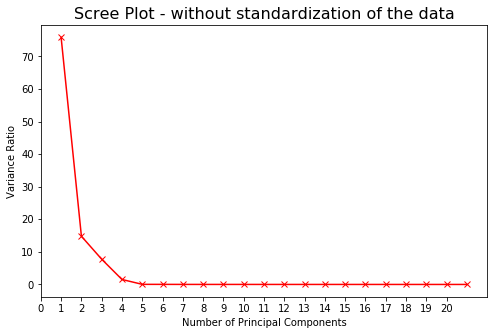

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
ii=np.arange(1,X.shape[1]+1)
var_exp_1=(pca.explained_variance_ratio_*100)
ax.plot(ii, var_exp_1,'rx-',label='Explained Variace Ratio')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot - without standardization of the data",fontsize=16)
#ax.legend()
plt.savefig("Scree Plot before std.png")
plt.show()

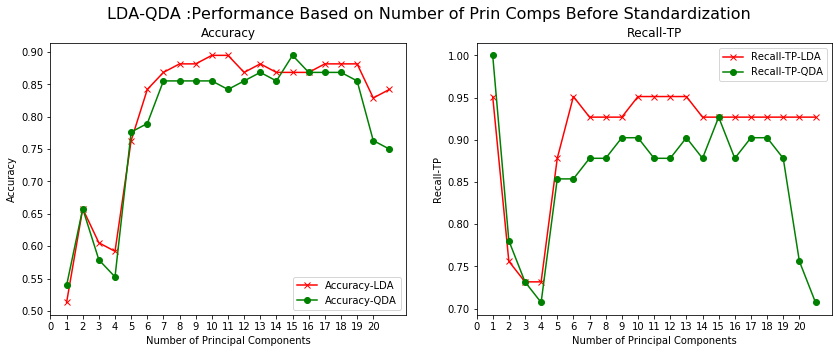

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))
ii=np.arange(1,X.shape[1]+1)
ax1.plot(ii, acc_lin_1,'rx-',label='Accuracy-LDA')
ax1.plot(ii, acc_q_1, 'go-',label='Accuracy-QDA')
ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0, 21, step=1))
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(ii, TP_lin_1,'rx-',label='Recall-TP-LDA')
ax2.plot(ii, TP_q_1, 'go-',label='Recall-TP-QDA')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax2.set_xticks(np.arange(0, 21, step=1))
ax2.legend()
f.suptitle('LDA-QDA :Performance Based on Number of Prin Comps Before Standardization', fontsize=16)
plt.savefig("LDA QDA  Performanve before std.png")
plt.show()

### Standardization and train test split

In [57]:
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

In [58]:
# Split the data into a training set and a test set
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

### LDA-QDA Dimensiality reduction - PCA (without standardization)

In [59]:
acc_lin_2=[]
acc_q_2=[]
TP_lin_2=[]
TP_q_2=[]

for i in range(1,X.shape[1]+1):
    
    pca_std = PCA(n_components=i)
    X_std_train_pc = pca_std.fit_transform(X_std_train)
    X_std_test_pc=pca_std.transform(X_std_test)
    
    lda= LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_lin_pred = lda.fit(X_std_train_pc, y_train).predict(X_std_test_pc)
    acc_lin_2.append(accuracy_score(y_test, y_lin_pred))
    precision,recall,fscore,support=score(y_test, y_lin_pred)
    TP_lin_2.append(recall[1]) 

    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_q_pred = qda.fit(X_std_train_pc, y_train).predict(X_std_test_pc)
    acc_q_2.append(accuracy_score(y_test, y_q_pred))
    precision,recall,fscore,support=score(y_test, y_q_pred)
    TP_q_2.append(recall[1])

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


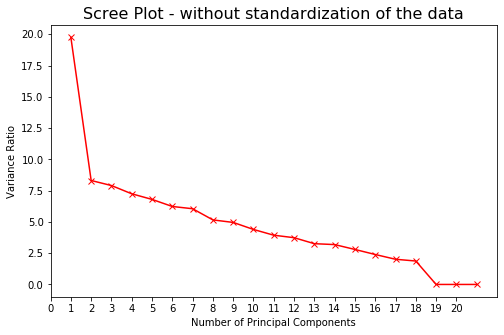

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
ii=np.arange(1,X.shape[1]+1)
var_exp_2=(pca_std.explained_variance_ratio_*100)
ax.plot(ii, var_exp_2,'rx-',label='Explained Variace Ratio')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot - without standardization of the data",fontsize=16)
#ax.legend()
plt.savefig("Scree Plot before std.png")
plt.show()

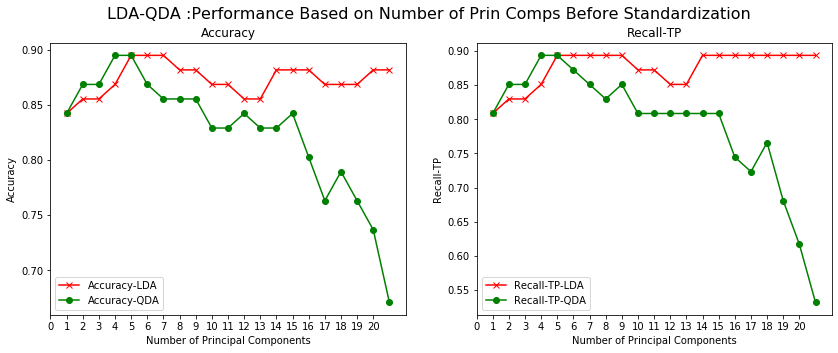

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))
ii=np.arange(1,X.shape[1]+1)
ax1.plot(ii, acc_lin_2,'rx-',label='Accuracy-LDA')
ax1.plot(ii, acc_q_2, 'go-',label='Accuracy-QDA')
ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0, 21, step=1))
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(ii, TP_lin_2,'rx-',label='Recall-TP-LDA')
ax2.plot(ii, TP_q_2, 'go-',label='Recall-TP-QDA')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax2.set_xticks(np.arange(0, 21, step=1))
ax2.legend()
f.suptitle('LDA-QDA :Performance Based on Number of Prin Comps Before Standardization', fontsize=16)
plt.savefig("LDA QDA  Performanve before std.png")
plt.show()

### Showing above result on the same plot

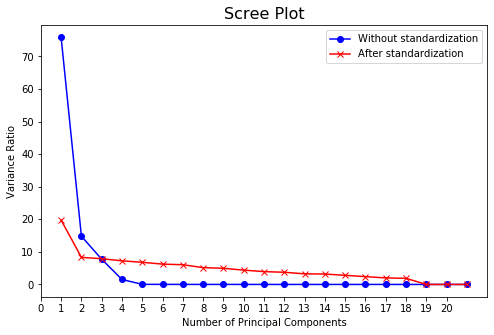

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ii, var_exp_1,'bo-',label='Without standardization')
ax.plot(ii, var_exp_2,'rx-',label='After standardization')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot",fontsize=16)
ax.legend()
plt.savefig("Scree Plot before and after.png")
plt.show()

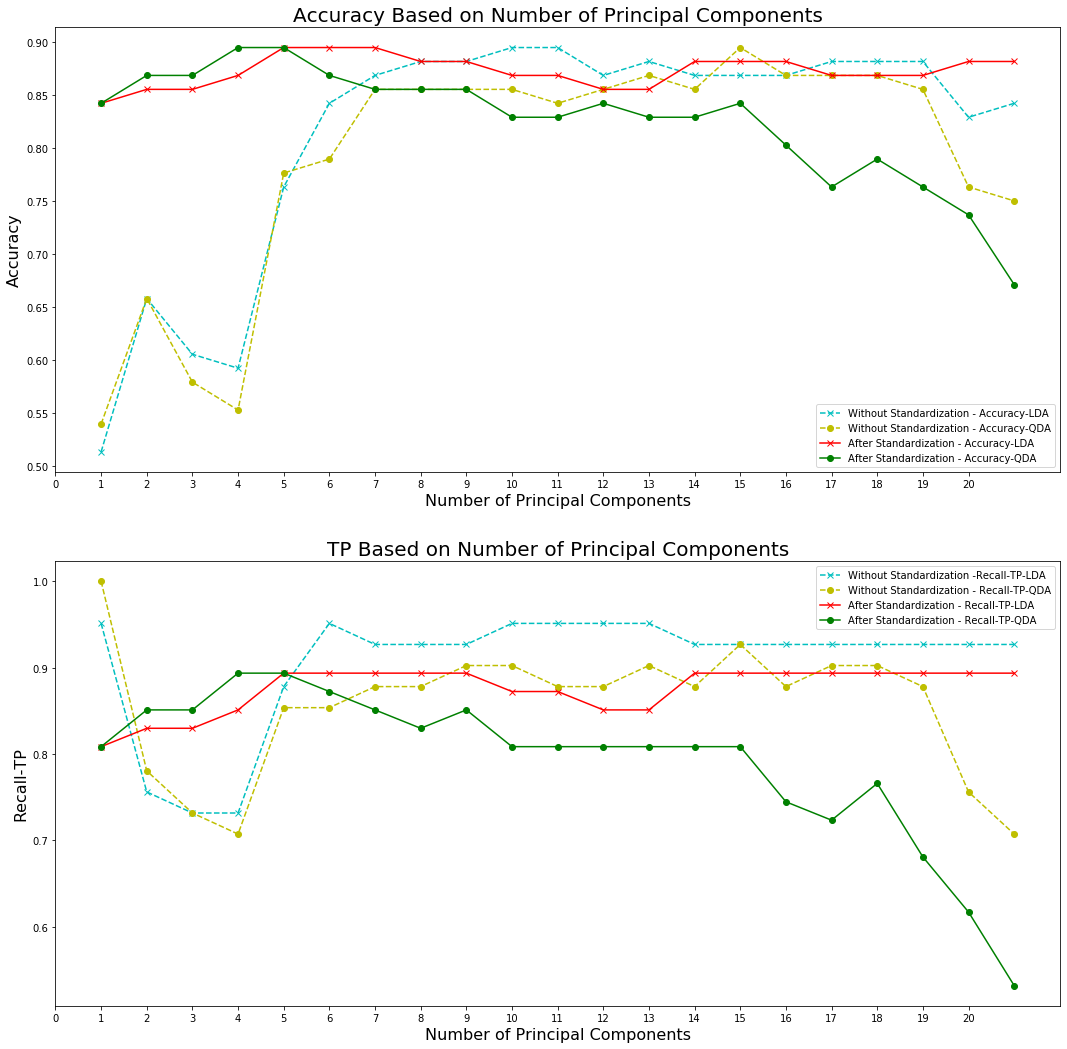

In [63]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False,figsize=(18, 18))
ii=np.arange(1,X.shape[1]+1)

ax1.plot(ii, acc_lin_1,'cx--',label='Without Standardization - Accuracy-LDA')
ax1.plot(ii, acc_q_1, 'yo--',label='Without Standardization - Accuracy-QDA')

ax1.plot(ii, acc_lin_2,'rx-',label='After Standardization - Accuracy-LDA')
ax1.plot(ii, acc_q_2, 'go-',label='After Standardization - Accuracy-QDA')

ax1.set_xlabel("Number of Principal Components",fontsize=16)
ax1.set_ylabel("Accuracy",fontsize=16)
ax1.set_xticks(np.arange(0, 21, step=1))
ax1.legend()

ax2.plot(ii, TP_lin_1,'cx--',label='Without Standardization -Recall-TP-LDA')
ax2.plot(ii, TP_q_1, 'yo--',label='Without Standardization - Recall-TP-QDA')

ax2.plot(ii, TP_lin_2,'rx-',label='After Standardization - Recall-TP-LDA')
ax2.plot(ii, TP_q_2, 'go-',label='After Standardization - Recall-TP-QDA')

ax2.set_xlabel("Number of Principal Components",fontsize=16)
ax2.set_ylabel("Recall-TP",fontsize=16)
ax2.legend()
#f.suptitle('Performance Based on Number of Principal Components After Standardization', fontsize=16)
ax1.set_title('Accuracy Based on Number of Principal Components', fontsize=20)
ax2.set_title('TP Based on Number of Principal Components', fontsize=20)
ax2.set_xticks(np.arange(0, 21, step=1))
plt.savefig("Performance Plot before and after.png")
plt.show()

## K-MEANS

In [64]:
def kmeansf ():
    acc_3=[]
    TP_3=[]
    for i in range(1,X_std.shape[1]+1):
        pca_std = PCA(n_components=i)
        X_std_train_pc = pca_std.fit_transform(X_std_train)
        X_std_test_pc=pca_std.transform(X_std_test)

        kmeans = KMeans(n_clusters=2)
        y_k_pred=kmeans.fit(X_std_train_pc).predict(X_std_test_pc)

        acc_3.append(accuracy_score(y_test, y_k_pred))
        cm_3 = confusion_matrix(y_test, y_k_pred) 
        precision,recall,fscore,support=score(y_test, y_k_pred)
        TP_3.append(recall[1])
        ii=np.arange(1,X.shape[1]+1)               
        
        if len(ii)==len(acc_3):
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))

            ax1.plot(ii, acc_3,'ro-',label='Accuracy')
            ax1.set_xticks(np.arange(0, 21, step=1))

            ax1.set_xlabel("Number of Principal Components")
            ax1.set_ylabel("Accuracy")
            ax1.set_title("Accuracy")
            ax1.legend()

            ax2.plot(ii, TP_3, 'go-',label='Recall-TP')
            ax2.set_xlabel("Number of Principal Components")
            ax2.set_ylabel("Recall-TP")
            ax2.set_title("Recall-TP")
            ax2.legend()
            ax2.set_xticks(np.arange(0, 21, step=1))
            f.suptitle('KMeans : Performance Based on Number of Principal Components After Standardization', fontsize=16)
            plt.savefig("K Means:Performance after standardization.png")
            plt.show()
            
            print("Max Accuracy  :")
            print("___________________________________")
            print('LDA-wo standardization- {:.3f} with {} components'.format(max(acc_lin_1),(acc_lin_1.index(max(acc_lin_1))+1)))
            print('LDA-with standardization- {:.3f} with {} components'.format(max(acc_lin_2),(acc_lin_2.index(max(acc_lin_2))+1)))
            print('QDA-wo standardization- {:.3f} with {} components'.format(max(acc_q_1),(acc_q_1.index(max(acc_q_1))+1)))
            print('QDA-with standardization- {:.3f} with {} components'.format(max(acc_q_2),(acc_q_2.index(max(acc_q_2))+1)))
            print('KMeans-with standardization- {:.3f} with {} components'.format(max(acc_3),(acc_3.index(max(acc_3))+1)))

            print()
            print("Max Recall-TP :")
            print("___________________________________")
            print('LDA-wo standardization- {:.3f} with {} components'.format(max(TP_lin_1),(TP_lin_1.index(max(TP_lin_1))+1)))
            print('LDA-with standardization- {:.3f} with {} components'.format(max(TP_lin_2),(TP_lin_2.index(max(TP_lin_2))+1)))
            print('QDA-wo standardization- {:.3f} with {} components'.format(max(TP_q_1),(TP_q_1.index(max(TP_q_1))+1)))
            print('QDA-with standardization- {:.3f} with {} components'.format(max(TP_q_2),(TP_q_2.index(max(TP_q_2))+1)))
            print('KMeans-with standardization- {:.3f} with {} components'.format(max(TP_3),(TP_3.index(max(TP_3))+1)))


    

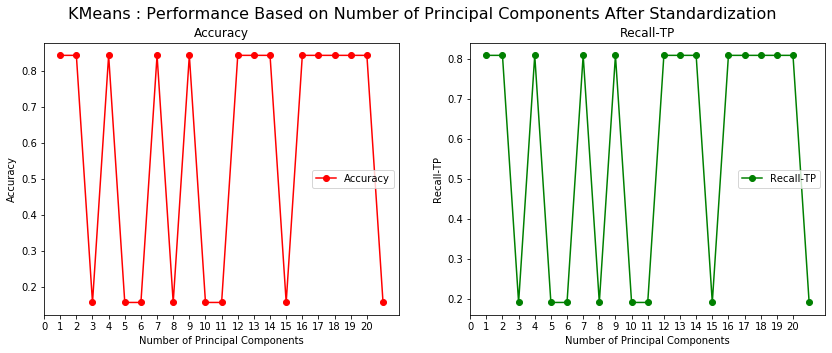

Max Accuracy  :
___________________________________
LDA-wo standardization- 0.895 with 10 components
LDA-with standardization- 0.895 with 5 components
QDA-wo standardization- 0.895 with 15 components
QDA-with standardization- 0.895 with 4 components
KMeans-with standardization- 0.842 with 1 components

Max Recall-TP :
___________________________________
LDA-wo standardization- 0.951 with 1 components
LDA-with standardization- 0.894 with 5 components
QDA-wo standardization- 1.000 with 1 components
QDA-with standardization- 0.894 with 4 components
KMeans-with standardization- 0.809 with 1 components


In [65]:
kmeansf()

In [66]:
acc_3=[]
TP_3=[]
for i in range(1,X_std.shape[1]+1):
    pca_std = PCA(n_components=i)
    X_std_train_pc = pca_std.fit_transform(X_std_train)
    X_std_test_pc=pca_std.transform(X_std_test)
    
    kmeans = KMeans(n_clusters=2)
    y_k_pred=kmeans.fit(X_std_train_pc).predict(X_std_test_pc)

    acc_3.append(accuracy_score(y_test, y_k_pred))
    cm_3 = confusion_matrix(y_test, y_k_pred) 
    precision,recall,fscore,support=score(y_test, y_k_pred)
    TP_3.append(recall[1])

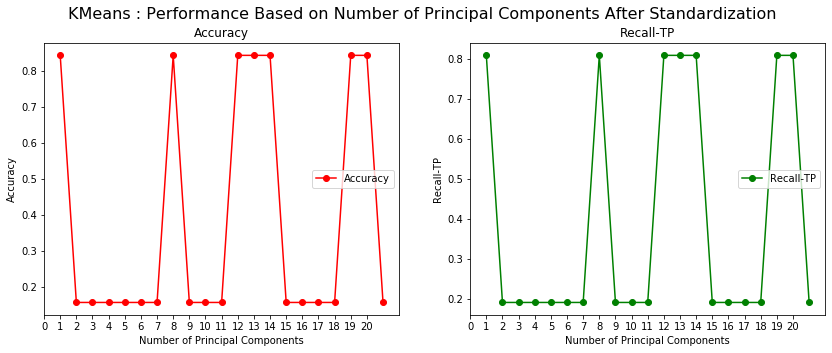

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))
ii=np.arange(1,X.shape[1]+1)

ax1.plot(ii, acc_3,'ro-',label='Accuracy')
ax1.set_xticks(np.arange(0, 21, step=1))

ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(ii, TP_3, 'go-',label='Recall-TP')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax2.legend()
ax2.set_xticks(np.arange(0, 21, step=1))
f.suptitle('KMeans : Performance Based on Number of Principal Components After Standardization', fontsize=16)
plt.savefig("K Means:Performance after standardization.png")
plt.show()

In [68]:
print("Max Accuracy  :")
print("___________________________________")
print('LDA-wo standardization- {:.3f} with {} components'.format(max(acc_lin_1),(acc_lin_1.index(max(acc_lin_1))+1)))
print('LDA-with standardization- {:.3f} with {} components'.format(max(acc_lin_2),(acc_lin_2.index(max(acc_lin_2))+1)))
print('QDA-wo standardization- {:.3f} with {} components'.format(max(acc_q_1),(acc_q_1.index(max(acc_q_1))+1)))
print('QDA-with standardization- {:.3f} with {} components'.format(max(acc_q_2),(acc_q_2.index(max(acc_q_2))+1)))
print('KMeans-with standardization- {:.3f} with {} components'.format(max(acc_3),(acc_3.index(max(acc_3))+1)))

print()
print("Max Recall-TP :")
print("___________________________________")
print('LDA-wo standardization- {:.3f} with {} components'.format(max(TP_lin_1),(TP_lin_1.index(max(TP_lin_1))+1)))
print('LDA-with standardization- {:.3f} with {} components'.format(max(TP_lin_2),(TP_lin_2.index(max(TP_lin_2))+1)))
print('QDA-wo standardization- {:.3f} with {} components'.format(max(TP_q_1),(TP_q_1.index(max(TP_q_1))+1)))
print('QDA-with standardization- {:.3f} with {} components'.format(max(TP_q_2),(TP_q_2.index(max(TP_q_2))+1)))
print('KMeans-with standardization- {:.3f} with {} components'.format(max(TP_3),(TP_3.index(max(TP_3))+1)))


Max Accuracy  :
___________________________________
LDA-wo standardization- 0.895 with 10 components
LDA-with standardization- 0.895 with 5 components
QDA-wo standardization- 0.895 with 15 components
QDA-with standardization- 0.895 with 4 components
KMeans-with standardization- 0.842 with 1 components

Max Recall-TP :
___________________________________
LDA-wo standardization- 0.951 with 1 components
LDA-with standardization- 0.894 with 5 components
QDA-wo standardization- 1.000 with 1 components
QDA-with standardization- 0.894 with 4 components
KMeans-with standardization- 0.809 with 1 components
